## فراخوانی فایل csv

In [16]:
import pandas as pd
data=pd.read_csv('breast_cancer.csv')
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## EDA

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [18]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
data.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


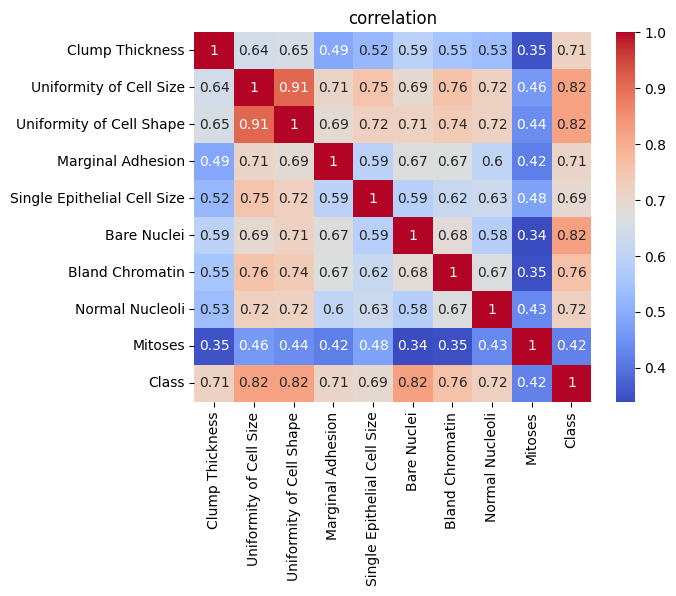

In [20]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('correlation')
plt.show()

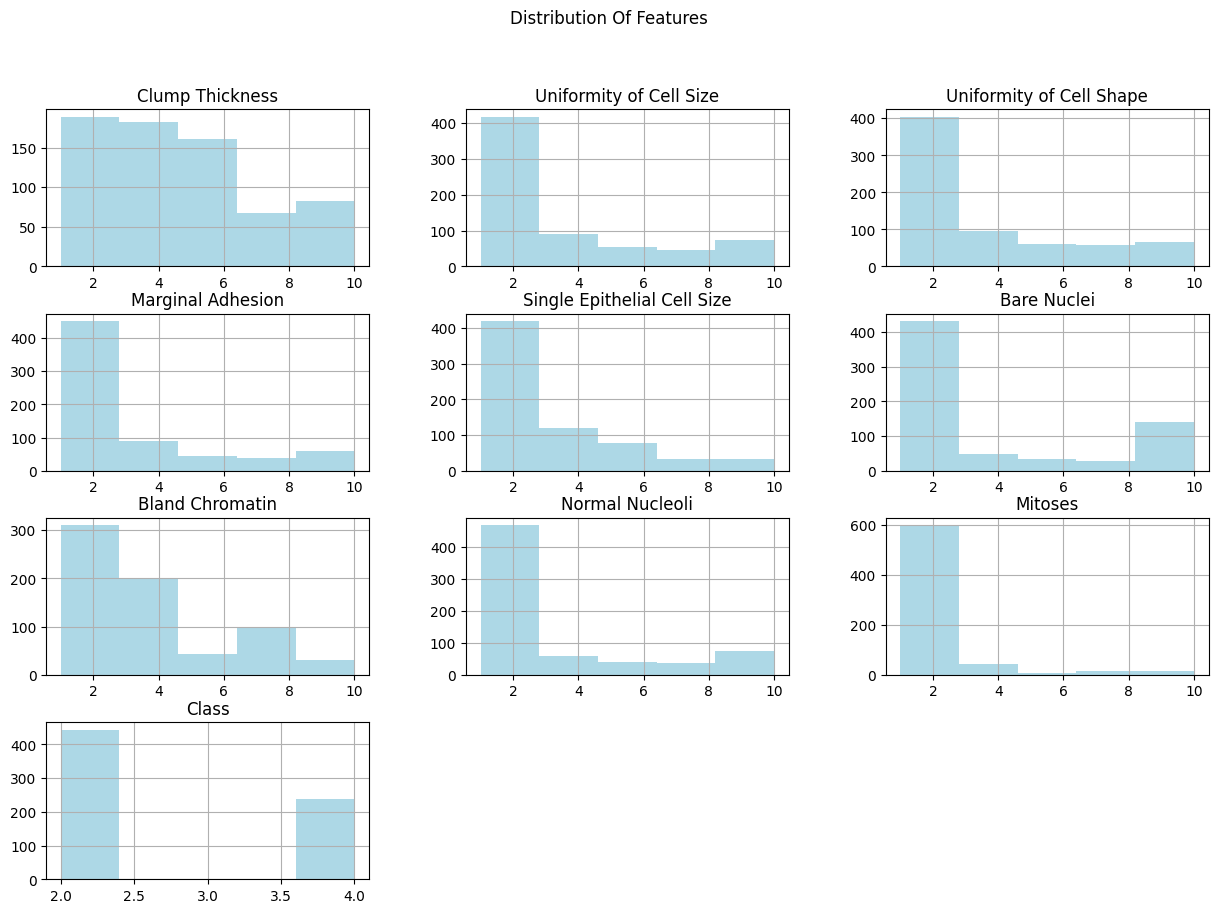

In [21]:
data.hist(bins=5,figsize=(15,10),color='lightblue')
plt.suptitle('Distribution Of Features')
plt.show()

In [22]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## cleanning + preprocess

In [28]:
columns=[col for col in data.columns if col!='Class']
for col in columns:
    data[col]=data[col].fillna(data[col].mean())

## Standardization

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(data.drop(columns='Class'))
X


array([[0.44444444, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.33333333, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.44444444, 1.        , 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.33333333, 0.77777778, 0.55555556, ..., 1.        , 0.55555556,
        0.        ],
       [0.33333333, 0.77777778, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

## Split Data

In [40]:
from sklearn.model_selection import train_test_split
y=data['Class']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train

array([[0.22222222, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.88888889, 0.33333333, ..., 0.44444444, 0.22222222,
        0.22222222],
       [0.44444444, 0.11111111, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.44444444, 0.66666667, ..., 0.22222222, 0.22222222,
        0.77777778],
       [0.33333333, 0.        , 0.        , ..., 0.11111111, 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.77777778, 0.77777778,
        0.77777778]])

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(max_iter=1000,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.948905109489051

## SVM

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC(random_state=42)
model.fit(x_train,y_train)
y_pred_svm=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.948905109489051

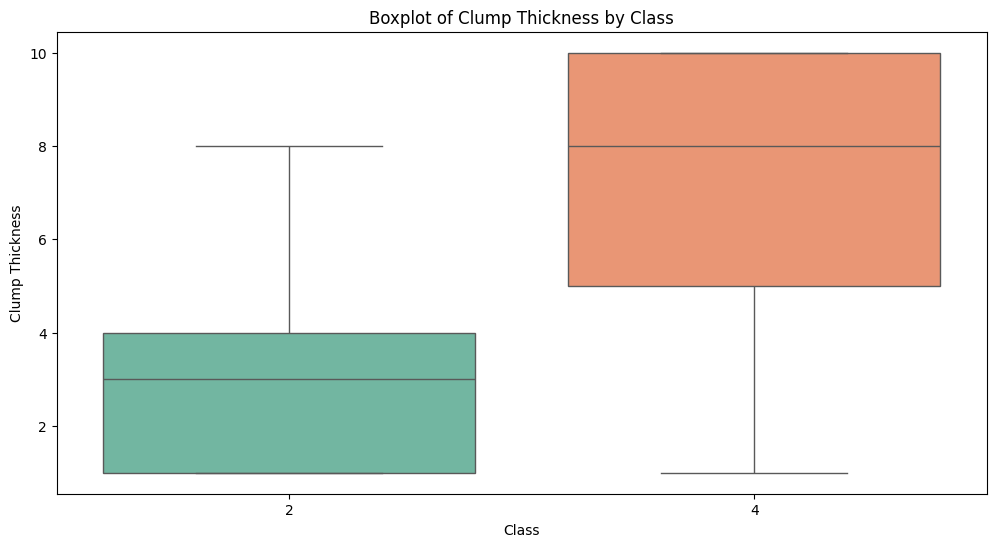

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Clump Thickness', data=data, hue="Class", palette="Set2", legend=False)
plt.title("Boxplot of Clump Thickness by Class")
plt.show()

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred_rf=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.948905109489051

## 

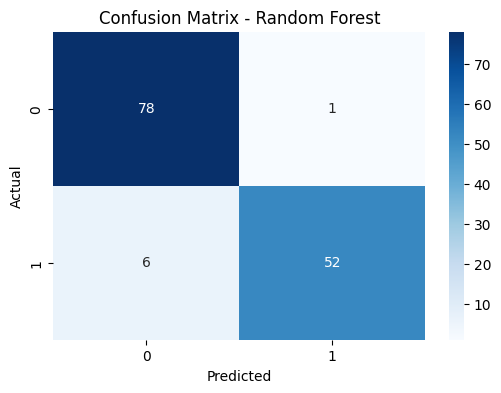

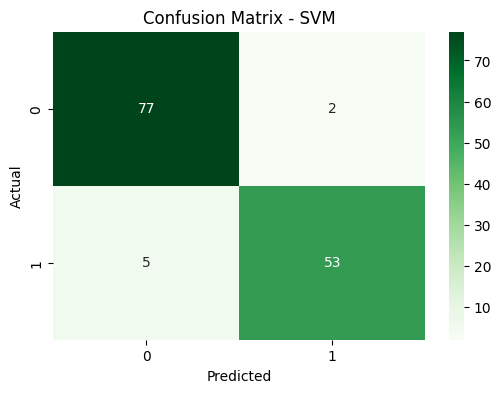

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

##Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## svm
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()